# Step 1: Environment setup

In [16]:
import os
isKaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')
if isKaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [ ]:
from fastai.vision.all import *
from duckduckgo_search import DDGS
import time

# Step 2: Data Setup

In [28]:
path = Path('/kaggle/input/prosthetic-classifier/prosthetic-classifier')

# Step 3: Data Cleaning

In [29]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

# Step 4: Create DataLoaders

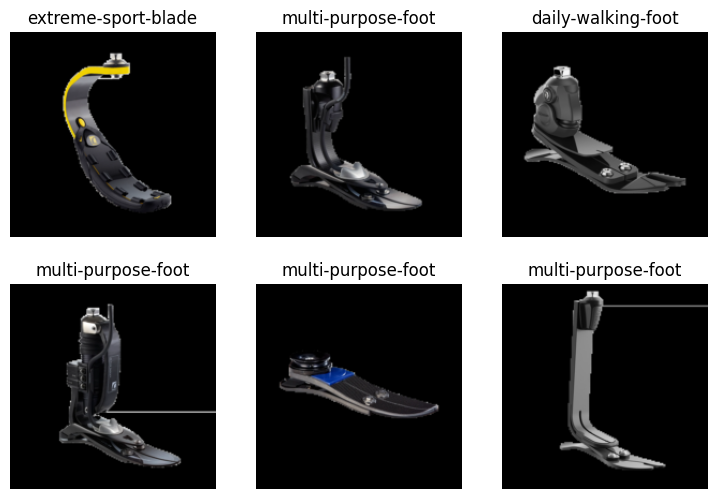

In [34]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=8) 

dls.show_batch(max_n=6)

# Step 5: Train Model

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 153MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.463103,0.729950,0.400000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.775173,0.284599,0.000000,00:04
1,1.389518,0.295429,0.200000,00:03
2,1.115413,0.397277,0.400000,00:03


# Step 6: Make Predictions

In [39]:
print("Testing daily walking foot:")
is_category,_,probs = learn.predict(PILImage.create('/kaggle/input/prosthetic-classifier/prosthetic-classifier/daily-walking-foot/ossur_proprio_foot.jpg'))
print(f" Prediction: {is_category}, Confidence: {probs.max():.4f}")

print("\nTesting extreme sport blade:")
is_category, _, probs = learn.predict(PILImage.create('/kaggle/input/prosthetic-classifier/prosthetic-classifier/extreme-sport-blade/ossur_cheetah_xceed.jpg'))
print(f"Predicted: {is_category}, Confidence: {probs.max():.4f}")

print("\nTesting multi-purpose foot:")
is_category, _, probs = learn.predict(PILImage.create('/kaggle/input/prosthetic-classifier/prosthetic-classifier/multi-purpose-foot/ossur_pro_flex_lp.jpg'))
print(f"Predicted: {is_category}, Confidence: {probs.max():.4f}")


Testing daily walking foot:


 Prediction: daily-walking-foot, Confidence: 0.8128

Testing extreme sport blade:


Predicted: extreme-sport-blade, Confidence: 0.9549

Testing multi-purpose foot:


Predicted: multi-purpose-foot, Confidence: 0.9014


# Step 7: Export Model

In [42]:
learn.export('prosthetic_classifier.pkl')
print("Model saved!")

Model saved!


# Step 8: Confusion Matrix

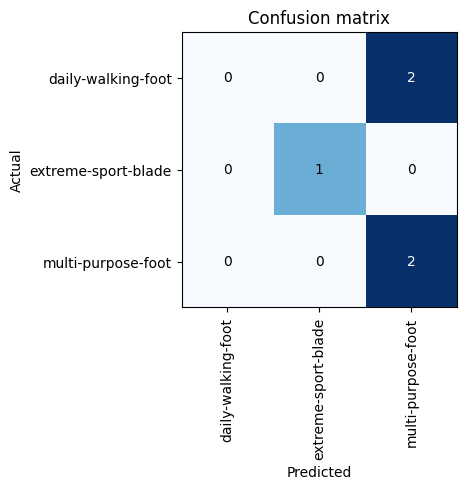

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()